---
 # **Sharpe vs Sortino**
 
 
- *Cálculo e comparação entre as duas importantes métricas de risco*
 










*O índice de Sharpe e o índice de Sortino são métricas de retorno sobre o investimento ajustadas ao risco. O índice de Sharpe indica o desempenho de um investimento em comparação com um investimento sem risco, levando em consideração o nível de risco adicional envolvido em manter o investimento em ações. O índice Sortino é uma variação do índice Sharpe que considera apenas o risco negativo.*






1. **Foco no tipo de risco:**
   - *O Índice de Sharpe mede o retorno ajustado ao risco de um investimento, levando em consideração todo o risco (volatilidade) associado ao investimento.*
   - *O Índice de Sortino, por outro lado, concentra-se especificamente no risco negativo ou desvio abaixo do objetivo (geralmente definido como a taxa livre de risco), ignorando a volatilidade positiva.*

2. **Fórmula:**
   - O Índice de Sharpe é calculado dividindo o retorno do investimento menos o retorno livre de risco pela volatilidade do investimento.
   - O Índice de Sortino é calculado dividindo o retorno do investimento menos o retorno livre de risco pelo desvio abaixo do objetivo.

3. **Interpretação:**
   - *O Índice de Sharpe fornece uma medida do retorno por unidade de risco total, incluindo tanto o risco positivo quanto o negativo.*
   - *O Índice de Sortino se concentra apenas no risco negativo, fornecendo uma medida mais específica do retorno ajustado ao risco para investidores preocupados principalmente com a proteção contra perdas.*

<br>

**Resumo:** *enquanto o Índice de Sharpe avalia o retorno ajustado ao risco total, o Índice de Sortino se concentra especificamente em avaliar o retorno ajustado ao risco negativo, sendo mais relevante para investidores que buscam proteção contra perdas.*


## **Fórmulas:**

<br>

- $\textbf{Sharpe ratio} = \frac{R{p}-R{f}}{{\sigma {p}}}$

where:<br>
$R{p}$ = return of portfolio (or stock)<br>
$R{f}$ = risk-free rate<br>
$\sigma {p}$ = standard deviation of returns<br>

<br>



<br>


$\textbf{Sortino ratio} = \frac{R{p}-R{f}}{{\sigma {p}}}$

where:<br>
$R{p}$ = return of portfolio (or stock)<br>
$R{f}$ = risk-free rate<br>
$\sigma {p}$ = standard deviation of the negative returns<br>

---

<br>


###  O **índice de Sharpe** é mais utilizado para avaliar carteiras de investimentos de **baixa volatilidade**;

<br>

###  A variação de **Sortino** é mais utilizada para avaliar carteiras de **alta volatilidade** (mercados em alta).

<br>

---



## **Passo a Passo:**

1. Instalação e importação das bibliotecas
2. Obtenção de dados
3. Análise das Métricas e Cálulo dos Indicadores
4. Vizualização da correlação entre os índices
4. Data Viz



### 1. Instalação e importação das bibliotecas

In [3]:
# Instalaçoes
!pip install quantstats
!pip install yfinance

  Obtaining dependency information for quantstats from https://files.pythonhosted.org/packages/bc/02/306226b38cc51972853f56866a566f224cf3855d1e3b492a774fb00c71a5/QuantStats-0.0.62-py2.py3-none-any.whl.metadata
  Using cached QuantStats-0.0.62-py2.py3-none-any.whl.metadata (8.9 kB)
Using cached QuantStats-0.0.62-py2.py3-none-any.whl (45 kB)


In [4]:
# Importações
import numpy as np
import pandas as pd
import yfinance as yf
import quantstats as qs
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### 2. Obtenção de dados

In [15]:
# Obtendo dados de Bitcoin

df_btc = yf.download('BTC-USD', period = 'max')[['Close']]

[*********************100%%**********************]  1 of 1 completed


In [16]:
df_btc.head()

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [17]:
df_btc.tail()

,Close
Date,
2024-03-05,63801.199219
2024-03-06,66106.804688
2024-03-07,66925.484375
2024-03-08,68300.093750
2024-03-10,68455.585938


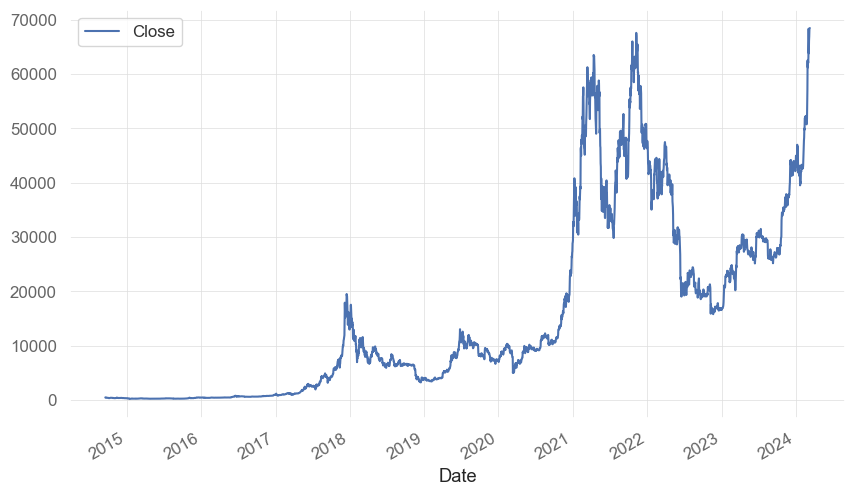

In [18]:
df_btc.plot();

### Análise das Métricas e Cálulo dos Indicadores

- Taxa livre de risco de 5% por semestre (Br).

In [24]:
# Calculando o Índice de Sharpe
sharpe = pd.Series(qs.stats.rolling_sharpe(df_btc['Close'], rf = 0.05).values)
# Calculando o Índice de Sortino
sortino = pd.Series(qs.stats.rolling_sortino(df_btc['Close'], rf = 0.05).values)
# Definindo os índices para plotar os dados juntos
sharpe.index = df_btc.index
sortino.index = df_btc.index

### Vizualização da correlação entre os índices

In [28]:
fig_corr = go.Figure()

fig_corr.add_trace({'type':'scatter',
                   'x': sharpe,
                   'y':sortino,
                   'mode':'markers',
                   'line':{'color':'purple'}})

fig_corr.update_layout(template='simple_white', paper_bgcolor="#f7f8fa",
                       title='<b>Correlação entre Sharpe e Sortino',
                        xaxis_title='<b>Sharpe', yaxis_title='<b>Sortino',
                        width=500, height=500)

In [38]:
corr, p = stats.pearsonr(sharpe.dropna(), sortino.dropna())
print('--------------------------------------------------------------------')
print('- Correlação de Pearson: Correlação(r) = %.3f' %corr, '|', 'P-value(p) = %.3f' %p)
print('--------------------------------------------------------------------')

--------------------------------------------------------------------
- Correlação de Pearson: Correlação(r) = 0.988 | P-value(p) = 0.000
--------------------------------------------------------------------


- A **alta correlação de Pearson (r = 0.988)** entre as métricas de Sharpe e Sortino sugere uma **forte associação positiva** entre elas.

<br>

- Quanto ao **p-valor (p = 0.000)**, que é **extremamente baixo**, indica que a correlação observada é **altamente significativa estatisticamente**, sugerindo que não é resultado do acaso, mas sim uma **relação genuína**.

### 5. Data Viz

In [53]:
fig = make_subplots(specs = [[{"secondary_y": True}]])

# Plotando o Indice Sharpe
fig.add_trace(go.Scatter(x = sharpe.index, y = sharpe,
                        name = 'Sharpe', line = dict(color = 'blue', width = 2)),
             secondary_y = False)

# Plotando o Indice Sortino
fig.add_trace(go.Scatter(x = sortino.index, y = sortino,
                        name = 'Sortino', line = dict(color = 'green', width = 2)),
             secondary_y = False)

# Plotando o Bitcoin
fig.add_trace(go.Scatter(x = df_btc.index, y = np.log(df_btc['Close']),
                        name = 'Bitcoin', line = dict(color = 'orange', width = 3)),
             secondary_y = True)

# Atualizando alguns parâmetros da figura gráfica
fig.update_yaxes(title_text = 'Risk-adjuste values', secondary_y = False)
fig.update_yaxes(title_text = 'log price Bitcoin', secondary_y = True)
fig.update_layout(title='<b>Bitcoin: Sharpe vs Sortino ratios', xaxis_title="<b>Data", legend_title="",
                  font=dict(family="Arial, Arial, Arial",size=15,color="black"), template = 'simple_white', paper_bgcolor="#f7f8fa",
                  margin=dict(l=75, r=20, t=70, b=70), legend=dict(orientation="h",yanchor="bottom",y=1,xanchor="right",x=0.4),
                  width=800,height=400)